<a href="https://colab.research.google.com/github/norgel/Analysis-of-Stroke-Patients/blob/main/Patient_Analysis_of_Stroke_Pre_Post_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Nicholas Orgel

Date Started: 11/02/2022

Dataset Aquired from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

- This is a classification dataset that has the task of identifying whether or not a person has had a stroke.
---
## **Description:**
- Excerpt from the dataset description: "According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient."

---

## **Tasks:**

- Deleted unnecessay columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

## **Import Libraries**

In [1]:
# Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline Display
from sklearn import set_config
set_config(display='diagram')

## **Load Dataset Head**

In [2]:
data = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

This is the list of columns that are present in the dataset. In my opinion, the 'id' column is not needed because it is vague and not categorized in a way that can be compared to the other columns.

---

I will make a copy of the data in order to enact all the changes.

### **Data Copy**

In [4]:
# Make a copy of the base dataset that is used for changes.
df_ml = df.copy()

In [5]:
# Delete the unnecessary 'id' column
df_ml = df_ml.drop(columns='id', axis=1)
df_ml.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Checking for duplicates in the dataset
df_ml.duplicated().sum()

0

In [7]:
# Checking for missing values in the dataset
df_ml.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **no duplicates** present in the dataset, but there is **201 missing values in the 'bmi'** column.

In [8]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There is **3 float datatypes**, **3 integer datatypes**, and **5 object datatypes**.

---

### **Identify Data Categories**

- **Numerical:** 'gender', 'age', 'bmi'
- **Ordinal:**
- **Nominal:**

### **Identify Categorical Values**

In [9]:
df_ml['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### **gender Ordinal Encoding**

In [85]:
df_ml['gender'].replace({'Other':0, 'Female': 1,
                         'Male': 2}, inplace=True)

In [86]:
df_ml['gender'].value_counts()

1    2994
2    2115
0       1
Name: gender, dtype: int64

There seems to be no inconsistencies with this column.

---

In [10]:
df_ml['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

There is a lot of inconsistencies and outliers in this data column. It can be better visualized in a boxplot.

Some values, like **0.08 do not make sense**, this would make sense if it were 8.00 years of age.

---

In [11]:
df_ml['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

There is no visible inconsistencies.
- 0 means the patient **does not have** hypertension.
- 1 means the patient **has** hypertension.
---

In [12]:
df_ml['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

There is no visible inconsistencies.
- 0 means the patient **does not have** heart disease.
- 1 means the patient **has** heart disease.
---

In [13]:
df_ml['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [65]:
df_ml['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)

In [94]:
df_ml['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.
---

In [14]:
df_ml['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

#### **work_type Ordinal Encoding**

In [95]:
df_ml['work_type'].replace({'Private': 0,
                            'Self-employed': 1,
                            'children': 2,
                            'Govt_job': 3,
                            'Never_worked': 4}, inplace=True)

In [96]:
df_ml['work_type'].value_counts()

0    2925
1     819
2     687
3     657
4      22
Name: work_type, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.

---

In [15]:
df_ml['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

#### **Residence_type Ordinal Encoding**

In [97]:
df_ml['Residence_type'].replace({'Urban': 0,
                                 'Rural': 1}, inplace=True)

In [98]:
df_ml['Residence_type'].value_counts()

0    2596
1    2514
Name: Residence_type, dtype: int64

There is no visible inconsistencies.

- This column can be ordinal encoded.

---

In [16]:
df_ml['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

There are no visible inconsistencies.

---

In [17]:
df_ml['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

There is no visible inconsistencies.

- But there is still 201 missing values in this column.
---

In [18]:
df_ml['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### **smoking_status Ordinal Encoding**

In [93]:
# Ordinal Encoding the 'smoking_status' column
df_ml['smoking_status'].replace({'never smoked': 0,
                                 'Unknown': 1,
                                 'formerly smoked': 2,
                                 'smokes': 3}, inplace=True)

In [124]:
df_ml['smoking_status'].value_counts()

0    1892
1    1544
2     885
3     789
Name: smoking_status, dtype: int64

No visible inconsistencies.

- Can be ordinal encoded.

---

In [19]:
df_ml['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- 0 means the patient has not had a stroke.
- 1 means the patient has had a stroke.

There is no visible inconsistencies.

---

# **Univariate Visualizations**

For target (y) and features (X)

- Target (y) is ['stroke']
- Features (X) are everything else.
---

#### **gender**

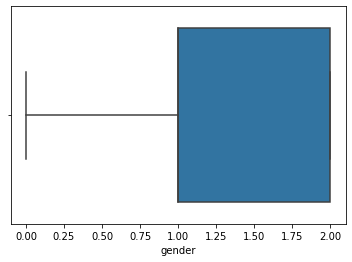

In [87]:
sns.boxplot(x='gender', data=df_ml);

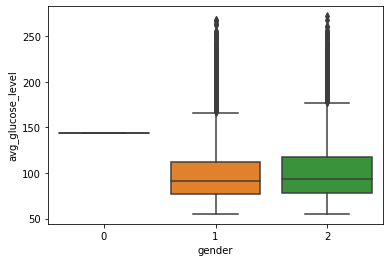

In [91]:
sns.boxplot(x='gender', y= 'avg_glucose_level', data = df_ml);

**Base Model**
- There is only a minimum line in the base gender boxplot for those whose gender is unknown or "other".

**Combined Model**
- You can see that there are numerous outliers on both the Male/Female genders around the 200 glucose level.

---

#### **age**

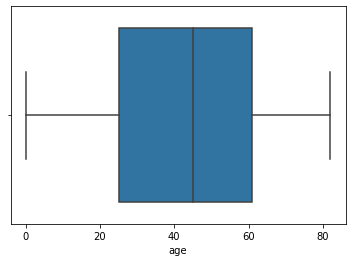

In [52]:
sns.boxplot(x='age', data = df_ml);

AxesSubplot(0.125,0.125;0.775x0.755)


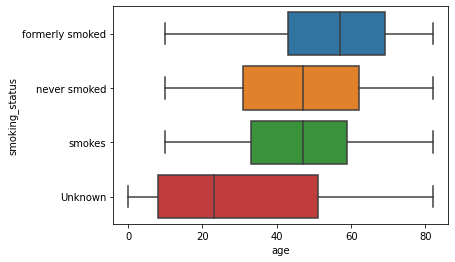

In [90]:
print(sns.boxplot(x='age', y='smoking_status', data = df));

**Base Model**
- There are no outliers on the age column on it's own. 

**Combined Model**
- When tracking smoking status based on age. There is a larger majority of people that have formerly smoked around the ages of 40-70.

---

#### **hypertension**

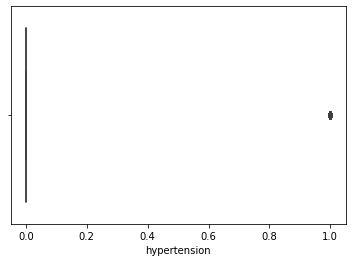

In [56]:
sns.boxplot(x='hypertension', data=df_ml);

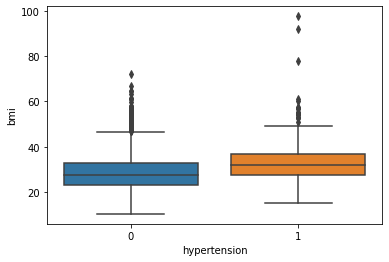

In [60]:
sns.boxplot(x='hypertension', y='bmi', data=df_ml);

**Base Model**
- In the base boxplot, the only outliers in the hypertension column are 1. Which is for patients that **do have hypertension**.

**Combined Model**
- In the boxplot that **compares 'hypertension' and 'bmi'**, there are bigger outliers for those that **do have hypertension with a BMI between 55-100**.

---

#### **heart_disease**

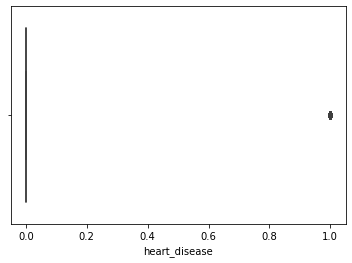

In [62]:
sns.boxplot(x='heart_disease', data = df_ml);

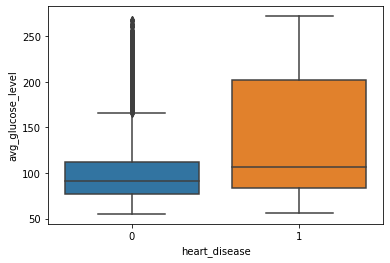

In [63]:
sns.boxplot(x='heart_disease', y='avg_glucose_level', data=df_ml);

**Base Model**
- In the base boxplot model, the only outliers are for those that do have heart disease.

**Combined Model**
- In the boxplot comparing heart disease and average glucose level. The only outliers are for patients that **did not have heart disease** & **had an avg. glucose level between 175-250**.

---

#### **ever_married**

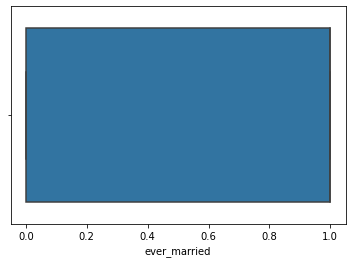

In [66]:
sns.boxplot(x='ever_married', data=df_ml);

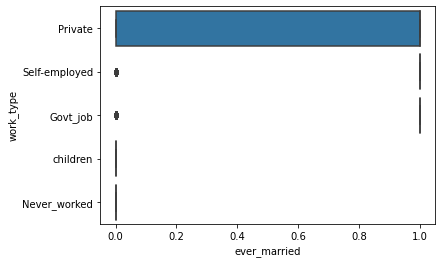

In [75]:
sns.boxplot(x='ever_married', y='work_type', data=df_ml);

**Base Model**
- In the base boxplot model, there is no outliers present.

**Combined Model**
- In the boxplot comparing whether a patient was ever married and their work type. The only outliers present are those who **were not married, and worked either a government job, or were self-employed.**

---

#### **work_type**

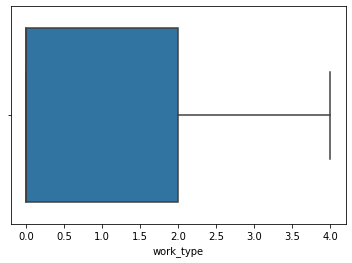

In [102]:
sns.boxplot(x='work_type', data=df_ml);

In [104]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

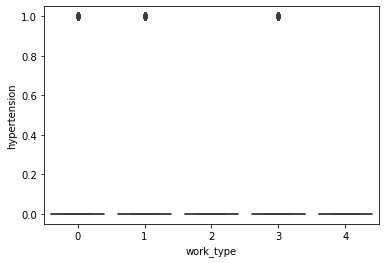

In [103]:
sns.boxplot(x='work_type', y='hypertension', data=df_ml);

**Base Model**
- There are no outliers

**Combined Model**
- There are outliers for people that **have hypertension** that work in either **the Private Sector (0), Self-employed (1), or work a Government Job (3).**

---

#### **Residence_type**

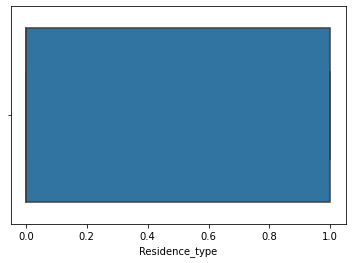

In [107]:
sns.boxplot(x='Residence_type', data=df_ml);

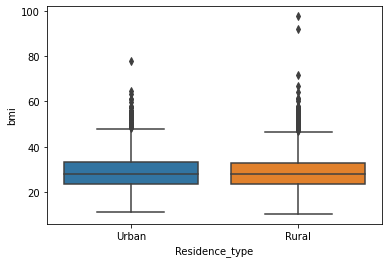

In [111]:
sns.boxplot(x='Residence_type', y='bmi',
            data=df);

**Base Model**
- There are no outliers present in the base model.

**Combined Model**
- In the combined model comparing Residence type and bmi, there are outliers present in both "Urban" and "Rural" residencies. But there appears to be more in the 'Rural' residence type.

---

#### **avg_glucose_level**

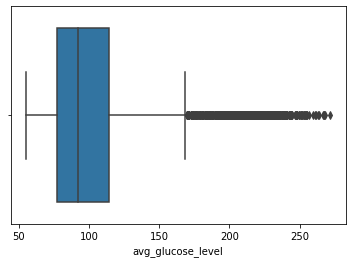

In [112]:
sns.boxplot(x='avg_glucose_level', data=df_ml);

**Base Model**
- There is a massive amount of outliers present after the average glucose level reaches around 160, and stretches past 250.

**Combined Model**

*The cell did not run properly, so I decided not to include a model at the moment.*

---

#### **bmi**

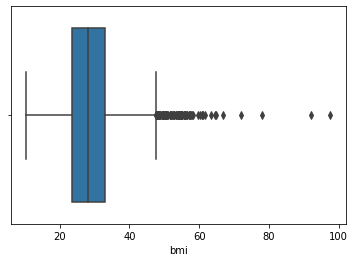

In [116]:
sns.boxplot(x='bmi', data=df_ml);

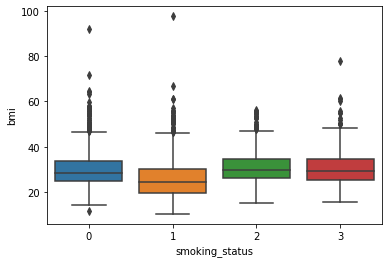

In [118]:
sns.boxplot(x='smoking_status', y='bmi', data=df_ml);

**Base Model**
- In the base model, there are outliers present around the bmi mark of 45-50 and stretching to a bmi of 100.

**Combined Model**
- In the combined model of 'bmi' and 'smoking status', there are outliers present in all the different values of smoking status. These outliers all start around the bmi mark of 45-50.

---

#### **smoking_status**

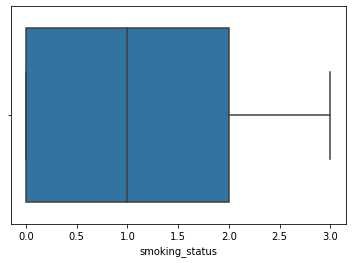

In [119]:
sns.boxplot(x='smoking_status', data=df_ml);

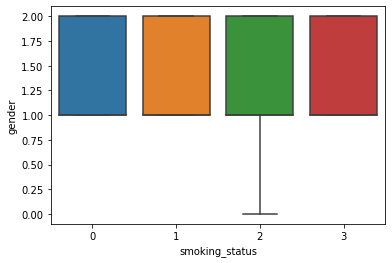

In [123]:
sns.boxplot(x='smoking_status', y='gender', data=df_ml);

**Base Model**
- In the base model, there are no outliers present.

**Combined Model**
- In the combined model of 'smoking_status' and 'gender'. There are no outliers present, but there is only whiskers (**black line**) present in the smoking value of 'formerly smoked'.

---

#### **stroke**

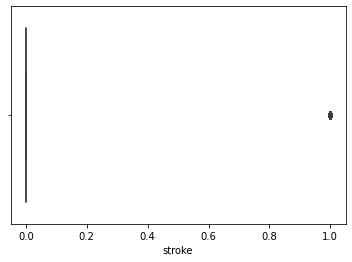

In [125]:
sns.boxplot(x='stroke', data=df_ml);

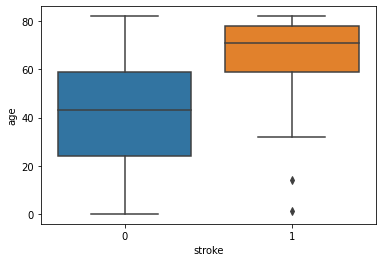

In [127]:
sns.boxplot(x='stroke', y='age', data=df_ml);

**Base Model**
- There are only outliers present in patients that have had a stroke.

**Combined Model**
- In the combined model of patients that have had a stroke and patients ages. There are only outliers present in patients that **have had a stroke and are between the ages of 20 and 0.**